 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_file = Path("./Resources/whale_returns.csv")
df_whale_returns = pd.read_csv(whale_file)

In [3]:
# Count nulls
df_whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whale_returns.dropna(inplace=True)

In [14]:
# clean up the column names
cols = ['Date','SOROS', 'PAULSON', 'TIGER', 'BERSHIRE']
df_whale_returns.columns = cols
df_whale_returns.head()

,Date,SOROS,PAULSON,TIGER,BERSHIRE
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [15]:
# Reading algorithmic returns
df_whale_returns.dtypes
df_whale_returns.set_index(pd.to_datetime(df_whale_returns['Date'], infer_datetime_format=True), inplace=True)
# isolate dfs
df_soros = df_whale_returns.drop(columns=['PAULSON', 'TIGER', 'BERSHIRE'])
df_soros.drop(columns=['Date'], inplace=True)
soros_daily_returns = df_soros.pct_change()

df_paulson = df_whale_returns.drop(columns=['SOROS', 'TIGER', 'BERSHIRE'])
df_paulson.drop(columns=['Date'], inplace=True)
paulson_daily_returns = df_paulson.pct_change()

df_tiger = df_whale_returns.drop(columns=['SOROS', 'PAULSON', 'BERSHIRE'])
df_tiger.drop(columns=['Date'], inplace=True)
tiger_daily_returns = df_tiger.pct_change()

df_berkshire = df_whale_returns.drop(columns=['SOROS', 'TIGER', 'PAULSON'])
df_berkshire.drop(columns=['Date'], inplace=True)
bershire_daily_returns = df_berkshire.pct_change()



In [16]:
# Count nulls soros
df_soros.isnull().sum()

SOROS    0
dtype: int64

In [17]:
# Count nulls paulson
df_paulson.isnull().sum()

PAULSON    0
dtype: int64

In [18]:
# count nulls tiger
df_tiger.isnull().sum()

TIGER    0
dtype: int64

In [19]:
# count nulls berkshire
df_berkshire.isnull().sum()

BERSHIRE    0
dtype: int64

In [20]:
# Drop nulls soros
df_soros.dropna(inplace=True)

In [21]:
# Drop nulls paulson
df_paulson.dropna(inplace=True)

In [22]:
# drop nulls tiger
df_tiger.dropna(inplace=True)

In [23]:
# drop nulls berkshire
df_berkshire.dropna(inplace=True)

In [24]:
# algo returns
algo_file = Path('./Resources/algo_returns.csv')
df_algo = pd.read_csv(algo_file)
df_algo.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [25]:
# clean up the algo file
df_algo.isnull().sum()


Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [26]:
df_algo.dropna(inplace=True)

In [27]:
df_algo.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [28]:
# check types
df_algo.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [29]:
# rename headers to a statndard format with _ between words
cols = ['Date','Algo_1', 'Algo_2']
df_algo.columns = cols

In [30]:
# convert algo date object to date format
df_algo.set_index(pd.to_datetime(df_algo['Date'], infer_datetime_format=True), inplace=True)

In [31]:
# Remove extra date
df_algo.drop(columns=['Date'], inplace=True)

In [32]:
# Check df_algo for format
df_algo.head()

,Algo_1,Algo_2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [33]:
# get df algo 1
df_algo_1_2 = df_algo




In [34]:
df_algo_1_2.head()

,Algo_1,Algo_2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [35]:
df_algo_1_2_returns = df_algo_1_2.pct_change()

In [36]:
# Check percennt change
df_algo_1_2_returns.head()

,Algo_1,Algo_2
Date,,
2014-06-05,NaN,NaN
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963


In [37]:
# drop nulls
df_algo_1_2_returns.dropna(inplace=True)
df_algo_1_2_returns.head()

,Algo_1,Algo_2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [38]:
# Reading S&P 500 Closing Prices
sp500_file = Path(".\Resources\sp500_history.csv")

In [39]:
# Check Data Types
df_sp500 = pd.read_csv(sp500_file)
df_sp500.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [40]:
# Fix Data Types
df_sp500['Close'] = df_sp500['Close'].str.replace('$', '')
df_sp500.head()

C:\Users\rainb\AppData\Local\Temp/ipykernel_1888/4071741086.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sp500['Close'] = df_sp500['Close'].str.replace('$', '')


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [41]:
# Change Close column to float
df_sp500['Close'] = df_sp500['Close'].astype(float)
df_sp500.dtypes

Date      object
Close    float64
dtype: object

In [42]:
# Change the date column to date
df_sp500['Date'] = df_sp500['Date'].astype('datetime64[ns]')
df_sp500.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [43]:
# index the date
df_sp500.set_index(pd.to_datetime(df_sp500['Date'], infer_datetime_format=True), inplace=True)
df_sp500.head()

,Date,Close
Date,,
2019-04-23,2019-04-23,2933.68
2019-04-22,2019-04-22,2907.97
2019-04-18,2019-04-18,2905.03
2019-04-17,2019-04-17,2900.45
2019-04-16,2019-04-16,2907.06


In [44]:
# remove the extra date
df_sp500.drop(columns=['Date'], inplace=True)


In [45]:
# Calculate Daily Returns
df_sp500_returns = df_sp500.pct_change()

In [46]:
# Drop nulls
df_sp500_returns.dropna(inplace=True)

In [47]:
# Rename `Close` Column to be specific to this portfolio.
df_sp500_returns.head()
df_sp500_returns.rename(columns={"Close":"SP500_Close"}, inplace=True)
# Check column change
df_sp500_returns.head()

,SP500_Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [48]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# join by date
company_list = [df_sp500_returns,df_algo_1_2_returns, df_berkshire, df_tiger, df_paulson, df_soros]
joined_data_rows = pd.concat(company_list, axis="columns", join="inner")
joined_data_rows.dropna()
# error on close header - renaming to SP_500
joined_data_rows

,SP500_Close,Algo_1,Algo_2,BERSHIRE,TIGER,PAULSON,SOROS
Date,,,,,,,
2019-04-22,-0.008764,-2.150780,0.574781,-0.001088,-0.003640,-0.007333,-0.002586
2019-04-18,-0.001011,-0.942926,-0.764890,0.001916,0.000582,0.001222,0.001448
2019-04-17,-0.001577,0.483294,-2.803170,0.003222,-0.004409,-0.006467,-0.002897
2019-04-16,0.002279,0.603391,-1.634218,0.000837,-0.000831,0.000388,0.002699
2019-04-15,-0.000509,-0.212628,-2.014920,-0.010492,0.000398,-0.001156,-0.001422
...,...,...,...,...,...,...,...
2015-03-09,0.017254,0.098917,-1.113716,-0.001652,0.005843,0.004225,0.000582
2015-03-06,-0.003929,4.190043,-3.650914,-0.013098,-0.008481,-0.003574,-0.007905
2015-03-05,0.014378,-0.888803,0.789231,0.006726,0.002355,0.004076,0.004016


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

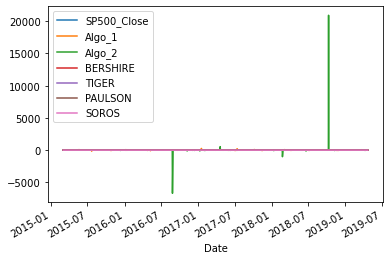

In [49]:
# Plot daily returns of all portfolios
joined_data_rows.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

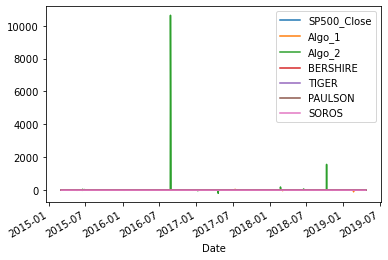

In [50]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_rows).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

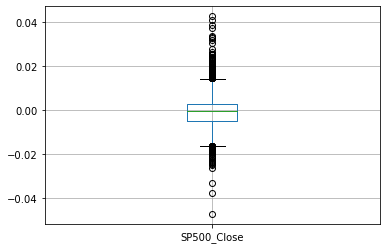

In [51]:
# Box plot to visually show risk
# company_list = [df_sp500_returns,df_algo_1_2_returns, df_berkshire, df_tiger, df_paulson, df_soros]
df_sp500_returns.boxplot()

<AxesSubplot:>

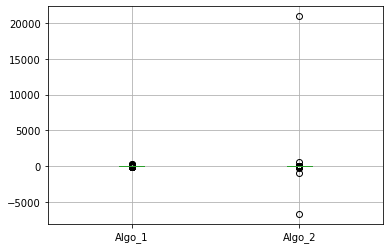

In [52]:
df_algo_1_2_returns.boxplot()

<AxesSubplot:>

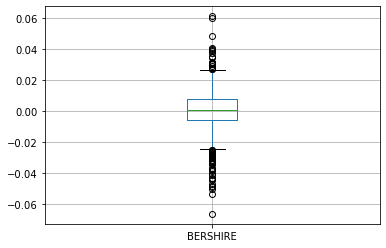

In [53]:
df_berkshire.boxplot()

<AxesSubplot:>

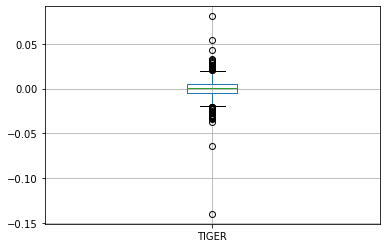

In [54]:
df_tiger.boxplot()

<AxesSubplot:>

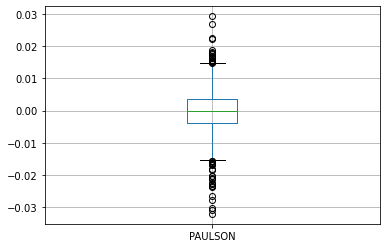

In [55]:
df_paulson.boxplot()

<AxesSubplot:>

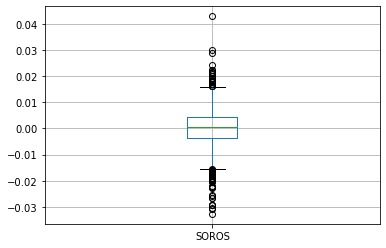

In [56]:
df_soros.boxplot()

<AxesSubplot:>

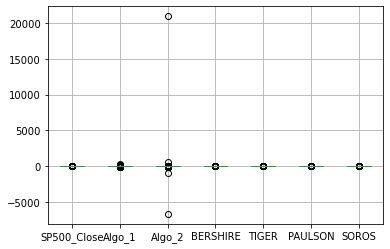

In [57]:
joined_data_rows.boxplot()

### Calculate Standard Deviations

In [58]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data_rows.std()

In [59]:
daily_std.head()

SP500_Close      0.008587
Algo_1          15.709453
Algo_2         682.184601
BERSHIRE         0.012919
TIGER            0.010897
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [60]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = df_sp500_returns.std()
daily_std_sp500.head()
# Determine which portfolios are riskier than the S&P 500
# Algo 2

SP500_Close    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SP500_Close        0.136313
Algo_1           249.379828
Algo_2         10829.344813
BERSHIRE           0.205079
TIGER              0.172989
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [62]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data_rows.rolling(window=21).mean()



,SP500_Close,Algo_1,Algo_2,BERSHIRE,TIGER,PAULSON,SOROS
Date,,,,,,,
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-03-09,-0.000021,-0.969833,0.825408,0.000783,0.001077,0.000988,0.001330
2015-03-06,-0.000080,-0.693924,0.718583,0.000070,0.000771,0.000826,0.001013
2015-03-05,0.000506,-0.510315,0.741632,0.000156,0.000663,0.000841,0.000948


<AxesSubplot:xlabel='Date'>

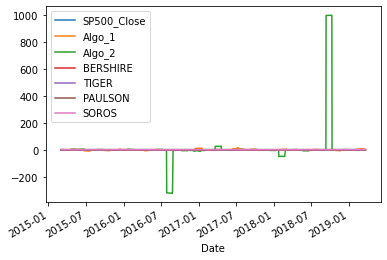

In [63]:
# Plot the rolling standard deviation
joined_data_rows.rolling(window=21).mean().plot()

### Calculate and plot the correlation

In [64]:
# Calculate the correlation
correlation = joined_data_rows.corr()
correlation
# Display de correlation matrix


,SP500_Close,Algo_1,Algo_2,BERSHIRE,TIGER,PAULSON,SOROS
SP500_Close,1.000000,-0.022727,0.080866,-0.013856,-0.001505,0.013549,0.000574
Algo_1,-0.022727,1.000000,0.000478,0.026208,0.023322,-0.011021,0.001391
Algo_2,0.080866,0.000478,1.000000,-0.126818,-0.037319,-0.049402,-0.114703
BERSHIRE,-0.013856,0.026208,-0.126818,1.000000,0.424125,0.545451,0.754157
TIGER,-0.001505,0.023322,-0.037319,0.424125,1.000000,0.434308,0.561040
PAULSON,0.013549,-0.011021,-0.049402,0.545451,0.434308,1.000000,0.699823
SOROS,0.000574,0.001391,-0.114703,0.754157,0.561040,0.699823,1.000000


<AxesSubplot:>

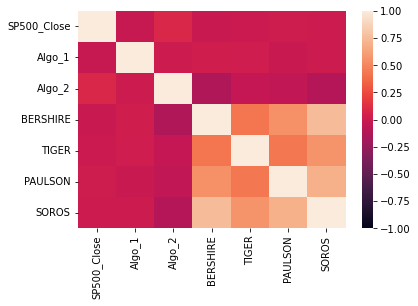

In [65]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [66]:
# Calculate covariance of a single portfolio
covariance = joined_data_rows['SP500_Close'].cov(joined_data_rows['BERSHIRE'])
# Calculate variance of S&P 500
variance = joined_data_rows['SP500_Close'].var()
# Computing beta
sp500_beta = covariance / variance




## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

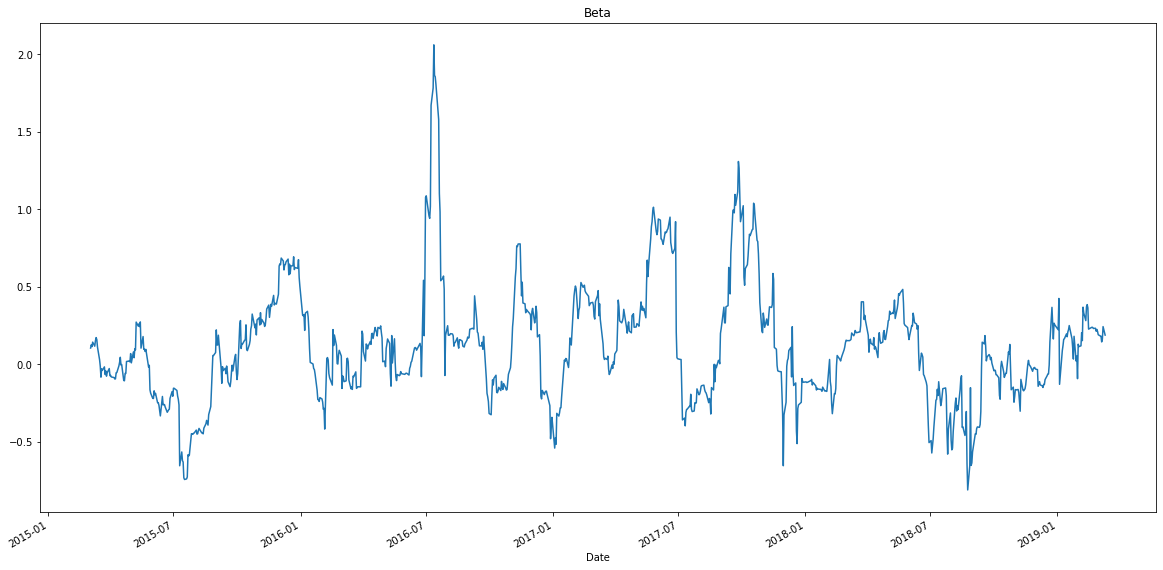

In [67]:
# Use `ewm` to calculate the rolling window
# Plot beta trend
rolling_sp500_covariance = joined_data_rows['SP500_Close'].rolling(window=30).cov(joined_data_rows['BERSHIRE'])
rolling_bershire_covariance = joined_data_rows['BERSHIRE'].rolling(window=30).cov(joined_data_rows['SP500_Close'])
rolling_variance = joined_data_rows['SP500_Close'].rolling(window=30).var()

rolling_sp500_beta = rolling_sp500_covariance / rolling_variance
rolling_algo1_beta = rolling_bershire_covariance / rolling_variance
ax = rolling_sp500_beta.plot(figsize=(20, 10), title='Beta')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_data_rows.mean()-0.1) * 252) / (joined_data_rows.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

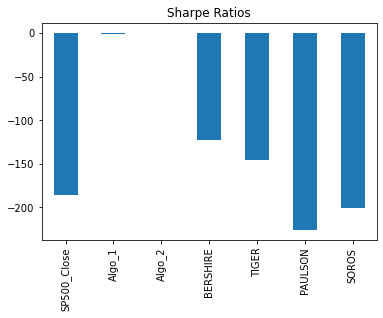

In [69]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes they do.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Reading data from 1st stock
google_file = Path("./Resources/goog_historical.csv")
df_google = pd.read_csv(google_file)
df_google.dtypes
df_google.rename(columns={"Trade DATE" : "Trade_DATE"}, inplace=True)
df_google.set_index(pd.to_datetime(df_google['Trade_DATE'], infer_datetime_format=True), inplace=True)
#df_google.set_index(pd.to_datetime(df_google['Trade DATE'], infer_datetime_format=True), inplace=True)
#df_google.drop(columns=['Trade DATE'], inplace=True)
df_google.head()

,Symbol,Trade_DATE,NOCP
Trade_DATE,,,
2019-05-09,GOOG,5/9/2019,1162.38
2019-05-08,GOOG,5/8/2019,1166.27
2019-05-07,GOOG,5/7/2019,1174.10
2019-05-06,GOOG,5/6/2019,1189.39
2019-05-03,GOOG,5/3/2019,1185.40


In [71]:
# Reading data from 2nd stock
cost_file = Path("./Resources/cost_historical.csv")
df_cost = pd.read_csv(cost_file)
df_cost.rename(columns={"Trade DATE" : "Trade_DATE"}, inplace=True)
df_cost.set_index(pd.to_datetime(df_cost['Trade_DATE'], infer_datetime_format=True), inplace=True)

df_cost.head()

,Symbol,Trade_DATE,NOCP
Trade_DATE,,,
2019-05-09,COST,5/9/2019,243.47
2019-05-08,COST,5/8/2019,241.34
2019-05-07,COST,5/7/2019,240.18
2019-05-06,COST,5/6/2019,244.23
2019-05-03,COST,5/3/2019,244.62


In [72]:
# Reading data from 3rd stock
aapl_file = Path("./Resources/aapl_historical.csv")
df_aapl = pd.read_csv(aapl_file)
df_aapl.rename(columns={"Trade DATE" : "Trade_DATE"}, inplace=True)
df_aapl.set_index(pd.to_datetime(df_aapl['Trade_DATE'], infer_datetime_format=True), inplace=True)
df_aapl.drop(columns=['Trade_DATE'], inplace=True)
df_aapl.head()

,Symbol,NOCP
Trade_DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [73]:
# Combine all stocks in a single DataFrame
joined_company_rows = pd.concat([df_google, df_cost, df_aapl], axis="rows", join="inner")

joined_company_rows.head()

,Symbol,NOCP
Trade_DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [74]:
# Reset Date index
joined_company = joined_company_rows.reset_index(drop=True)


In [75]:
# Reorganize portfolio data by having a column per symbol
all_prices = joined_company_rows.pivot_table(values="NOCP", index="Trade_DATE", columns="Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade_DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [76]:
# Calculate daily returns
all_prices =  all_prices.pct_change()
# Drop NAs
all_prices.dropna(inplace=True)
# Display sample data
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade_DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [77]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = weights[0] * all_prices + weights[1] * all_prices + weights[2] * all_prices
# Display sample data
portfolio_returns.head()

Symbol,AAPL,COST,GOOG
Trade_DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [84]:
# Join your returns DataFrame to the original returns DataFrame
# change the date
portfolio_returns.rename(columns={"Trade_DATE" : "Date"}, inplace=True)
portfolio_returns.head()



Symbol,AAPL,COST,GOOG
Trade_DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [85]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

Symbol,AAPL,COST,GOOG
Trade_DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [86]:
portfolio_returns.std()

Symbol
AAPL    0.018706
COST    0.013186
GOOG    0.016602
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [222]:
# Calculate the annualized `std`
port_daily_std = joined_portfolio_rows.std()
port_annualized_std = port_daily_std * np.sqrt(252)
annualized_std.head()



SP500_Close        0.136313
Algo_1           249.379828
Algo_2         10829.344813
BERSHIRE           0.205079
TIGER              0.172989
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [ ]:
It sucked, I missed a few things :}